# **1. PREPARACIÓN DEL DATASET**

  Este notebook documenta el proceso de preparación y análisis exploratorio del conjunto de datos utilizado para la clasificación de ADL en el marco de un sistema de Stream Learning (SL).


**1.1 IMPORTACIÓN DE LIBRERIAS**

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from natsort import natsorted
from glob import glob #buscar archivos dentro carpetas
import os # Trabajar con carpetas y rutas archivos
import re #extraer info del archivo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


Ruta de los datasets

In [3]:
ruta_base= '/content/drive/MyDrive/Colab Notebooks/TESIS/FASE OFFLINE/DATOS_OFFLINE'

**1.2  CARGA Y UNIÓN DE ARCHIVOS**

Lectura de archivos CSV crudos y unificación en un único Dataset estructurado

In [4]:
# Leer todos los archivos CSV
archivos = glob(os.path.join(ruta_base, '*.csv'))

# Ordenar los archivos por nombre (P1, P2, P3..P5)
archivos_ordenados = natsorted(archivos)

# Lista para guardar los DataFrames
dataframes = []

# Procesar los archivos ordenados
for archivo in archivos_ordenados:
    nombre = os.path.basename(archivo).replace('.csv', '')

    # Extraer participante
    match_participante = re.match(r'(P\d+)_', nombre)
    participante = match_participante.group(1) if match_participante else 'desconocido'

    # Extraer actividad
    match_actividad = re.match(r'P\d+_(.*?)_', nombre)
    actividad = match_actividad.group(1).lower() if match_actividad else 'desconocida'

    # Extraer ubicación
    match_ubicacion = re.match(r'P\d+_.*?_(.*?)_', nombre)
    ubicacion = match_ubicacion.group(1).lower() if match_ubicacion else 'desconocida'

    ubicacion = ubicacion.strip().lower()

    # Extraer frecuencia
    match_frec = re.match(r'.*_(\d+)HZ', nombre)
    frecuencia = int(match_frec.group(1)) if match_frec else -1

    # Leer el CSV
    df = pd.read_csv(archivo)

    # Añadir columnas
    df['participante'] = participante
    df['etiqueta'] = actividad
    df['ubicacion'] = ubicacion
    df['frecuencia_nominal'] = frecuencia

    # Añadir al conjunto
    dataframes.append(df)

# Concatenar respetando el orden (P1,P2..P5)
df_unido = pd.concat(dataframes, ignore_index=True)

# Guardar como archivo Excel
df_unido.to_excel('dataset_unido.xlsx', index=False)

# Mostrar DataFrame
df_unido


,timestamp,ax,ay,az,gx,gy,gz,accel_freq,gyro_freq,participante,etiqueta,ubicacion,frecuencia_nominal
0,2025-05-20T17:24:59.877643,0.699302,6.089435,8.568398,-0.079892,-0.073235,0.139945,20.28,20.28,P1,caerse,bolsillo,20
1,2025-05-20T17:24:59.928284,0.699302,6.089435,8.568398,-0.079892,-0.073235,0.139945,19.74,19.74,P1,caerse,bolsillo,20
2,2025-05-20T17:24:59.989392,3.614658,6.065506,9.126525,-0.125831,-0.396000,-0.147002,16.36,16.36,P1,caerse,bolsillo,20
3,2025-05-20T17:25:00.026915,3.614658,6.065506,9.126525,-0.125831,-0.396000,-0.147002,26.65,26.65,P1,caerse,bolsillo,20
4,2025-05-20T17:25:00.077204,3.614658,6.065506,9.126525,-0.125831,-0.396000,-0.147002,19.89,19.89,P1,caerse,bolsillo,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79569,2025-05-20T17:11:02.034048,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.46,49.46,P5,sentarse,muñeca,50
79570,2025-05-20T17:11:02.053553,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,51.27,51.27,P5,sentarse,muñeca,50
79571,2025-05-20T17:11:02.073619,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.84,49.84,P5,sentarse,muñeca,50
79572,2025-05-20T17:11:02.093533,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,50.22,50.22,P5,sentarse,muñeca,50


**1.3 ANÁLISIS Y ENTENDIMIENTO DE LOS DATOS**

Exploración inicial del dataset
- Verificación de valores nulos
- Conteo de muestras por clase, combinación y participante
- Visualización de distribuciones

In [5]:
# Verificación de valores nulos
print("\nValores nulos por columna:")
print(df_unido.isnull().sum())


Valores nulos por columna:
timestamp             0
ax                    0
ay                    0
az                    0
gx                    0
gy                    0
gz                    0
accel_freq            0
gyro_freq             0
participante          0
etiqueta              0
ubicacion             0
frecuencia_nominal    0
dtype: int64


Distribución por actividad

Número total de muestras: 79574

Distribución por actividad:
etiqueta
caerse      29595
gradas      19635
caminar     15480
sentarse    14864
Name: count, dtype: int64


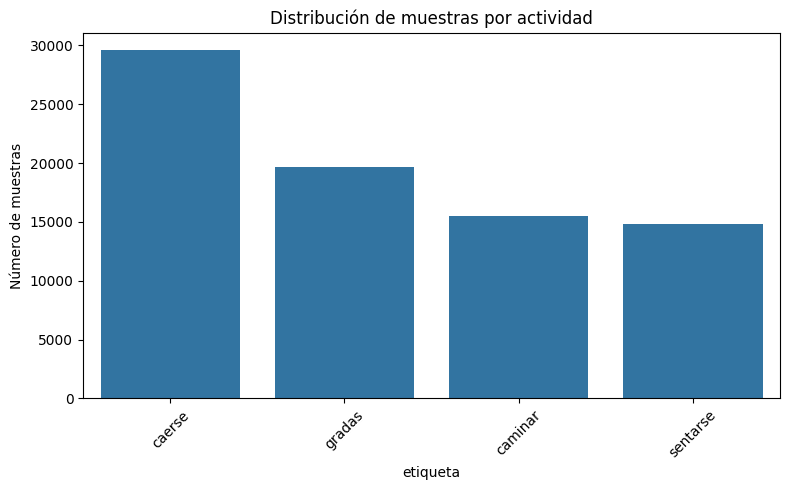

In [6]:
# Número total de muestras
total_muestras = len(df_unido)
print(f"Número total de muestras: {total_muestras}")

# Distribución por clase (actividad)
print("\nDistribución por actividad:")
print(df_unido['etiqueta'].value_counts())

# Visualización: cantidad de muestras por actividad
plt.figure(figsize=(8, 5))
sns.countplot(data=df_unido, x='etiqueta', order=df_unido['etiqueta'].value_counts().index)
plt.title('Distribución de muestras por actividad')
plt.xticks(rotation=45)
plt.ylabel('Número de muestras')
plt.tight_layout()
plt.show()


Distribución por participante


Distribución por participante:
participante
P3    19357
P4    17433
P1    14666
P5    14063
P2    14055
Name: count, dtype: int64


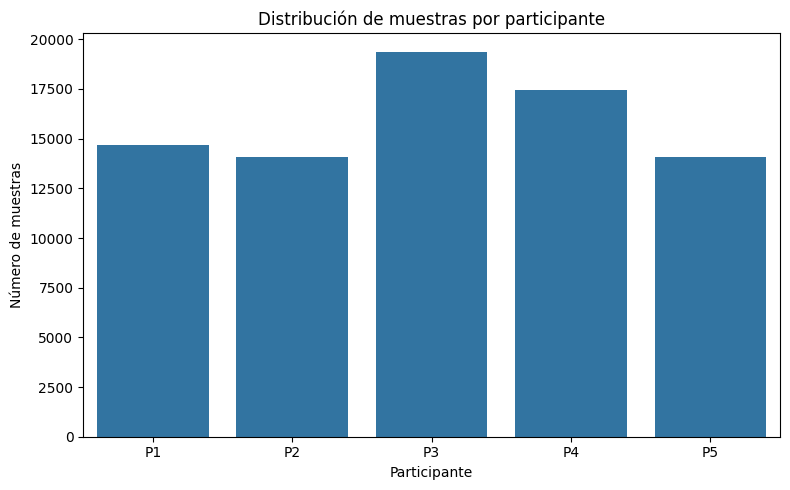

In [7]:
# Distribución por participante
print("\nDistribución por participante:")
print(df_unido['participante'].value_counts())

# Visualización: cantidad de muestras por participante
orden_participantes = ['P1', 'P2', 'P3', 'P4', 'P5']
plt.figure(figsize=(8, 5))
sns.countplot(data=df_unido, x='participante', order=orden_participantes)
plt.title('Distribución de muestras por participante')
plt.xlabel('Participante')
plt.ylabel('Número de muestras')
plt.tight_layout()
plt.show()

Distribución por combinación (ubicación + frecuencia)


Distribución por ubicación y frecuencia:
ubicacion  frecuencia_nominal
bolsillo   20                    12429
           50                    27414
muñeca    20                    12579
           50                    27152
dtype: int64


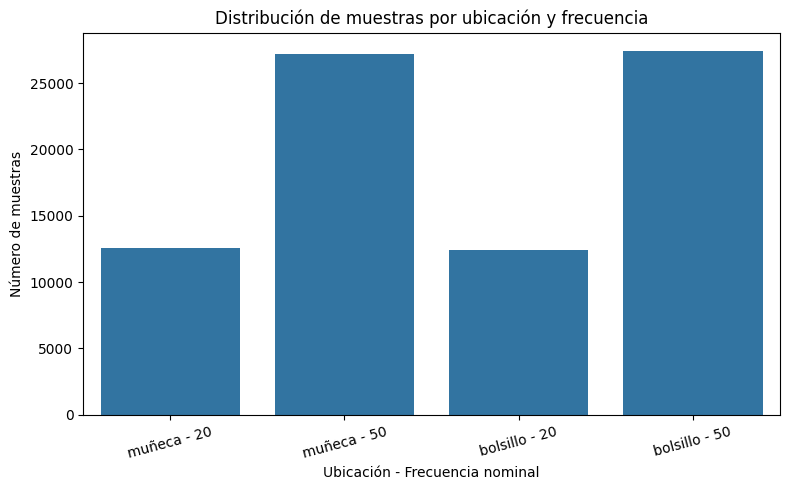

In [8]:
# Distribución por combinación de frecuencia y ubicación
print("\nDistribución por ubicación y frecuencia:")
print(df_unido.groupby(['ubicacion', 'frecuencia_nominal']).size())

# Visualización: cantidad de muestras por combinación (ubicación + frecuencia)
import unicodedata

# Función para normalizar texto Unicode
def normalizar_unicode(texto):
    if isinstance(texto, str):
        return unicodedata.normalize('NFC', texto.strip().lower())
    return texto

# Aplicar la normalización
df_unido['ubicacion'] = df_unido['ubicacion'].apply(normalizar_unicode)

# Crear la columna de combinación (ubicación + frecuencia)
df_unido['combinacion'] = df_unido['ubicacion'].str.lower().str.strip() + ' - ' + df_unido['frecuencia_nominal'].astype(str)

# Orden deseado para el eje X
orden_combinaciones = ['muñeca - 20', 'muñeca - 50', 'bolsillo - 20', 'bolsillo - 50']

# Crear la gráfica
plt.figure(figsize=(8, 5))
sns.countplot(data=df_unido, x='combinacion', order=orden_combinaciones)
plt.title('Distribución de muestras por ubicación y frecuencia')
plt.xlabel('Ubicación - Frecuencia nominal')
plt.ylabel('Número de muestras')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**1.4  ANÁLISIS DE FRECUENCIA REAL**
- Cálculo y visualización de frecuencia real por combinación
- Detección de outliers
- Evaluación de variabilidad por usuario

Boxplot por ubicación y frecuencia

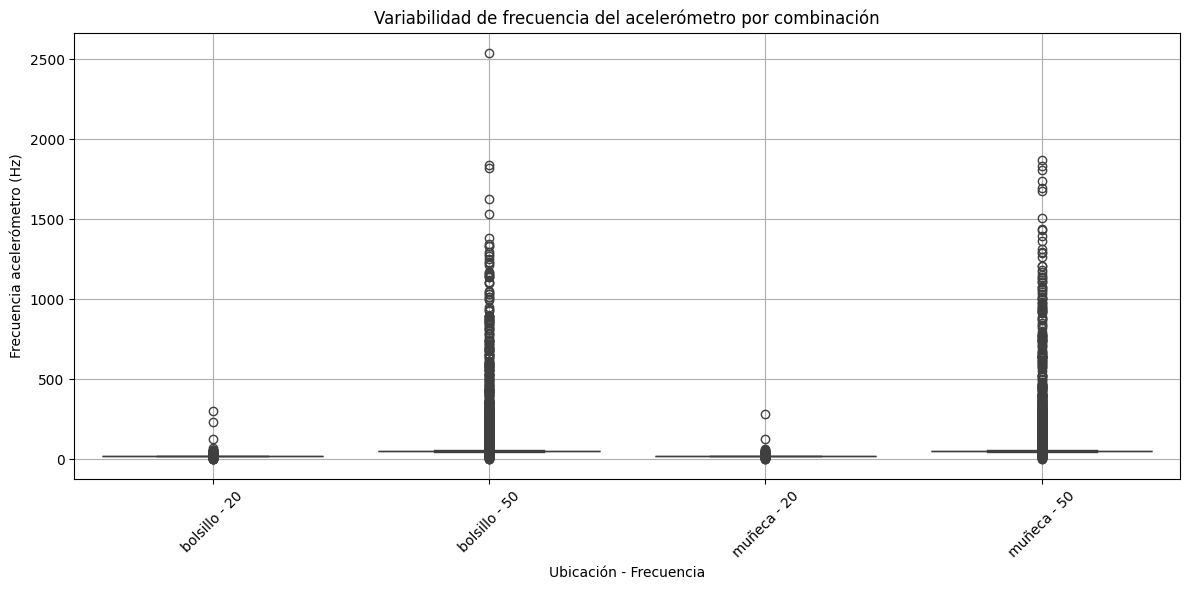

In [9]:
# Gráfico boxplot para acelerómetro
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_unido, x='combinacion', y='accel_freq')
plt.title('Variabilidad de frecuencia del acelerómetro por combinación')
plt.xlabel('Ubicación - Frecuencia')
plt.ylabel('Frecuencia acelerómetro (Hz)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Desviación estandar de la frecuencia real agrupado por participante y combinación

In [10]:
# Agrupar por participante y combinación, y calcular la desviación estándar de la frecuencia del acelerometro
desviacion_std = df_unido.groupby(['participante', 'combinacion'])['accel_freq'].std().reset_index()

# Renombrar la columna
desviacion_std = desviacion_std.rename(columns={'accel_freq': 'std_accel_freq'})
print(desviacion_std)

   participante    combinacion  std_accel_freq
0            P1  bolsillo - 20        8.132509
1            P1  bolsillo - 50       96.418330
2            P1    muñeca - 20        6.266855
3            P1    muñeca - 50       94.309717
4            P2  bolsillo - 20        3.198884
5            P2  bolsillo - 50      107.676836
6            P2    muñeca - 20        3.628750
7            P2    muñeca - 50      112.379696
8            P3  bolsillo - 20        0.537973
9            P3  bolsillo - 50        3.505082
10           P3    muñeca - 20        0.856778
11           P3    muñeca - 50        6.919892
12           P4  bolsillo - 20        0.721281
13           P4  bolsillo - 50       32.788139
14           P4    muñeca - 20        0.650393
15           P4    muñeca - 50       12.472994
16           P5  bolsillo - 20        0.481850
17           P5  bolsillo - 50       18.309419
18           P5    muñeca - 20        0.568706
19           P5    muñeca - 50        5.722675


Contar los valores atipicos en la frecuencia que tiene cada participante

In [11]:
# Verificación de frecuencia nominal sea int
df_unido['frecuencia_nominal'] = df_unido['frecuencia_nominal'].astype(int)

# Función para identificar si accel_freq es atípico para su frecuencia nominal
def es_outlier(freq, nominal):
    if nominal == 20:
        return (freq < 15) | (freq > 25)
    elif nominal == 50:
        return (freq < 40) | (freq > 60)
    else:
        return False

# Aplicar la función
df_unido['outlier_freq'] = df_unido.apply(
    lambda row: es_outlier(row['accel_freq'], row['frecuencia_nominal']),
    axis=1
)

# Contar outliers por participante y frecuencia nominal
outlier_counts = df_unido[df_unido['outlier_freq'] == True] \
    .groupby(['participante', 'frecuencia_nominal']) \
    .size().reset_index(name='n_outliers')

# Total de muestras por grupo
total_counts = df_unido.groupby(['participante', 'frecuencia_nominal']).size().reset_index(name='n_total')

# Unir los dos conteos y calcular el porcentaje
resumen_outliers = pd.merge(total_counts, outlier_counts, on=['participante', 'frecuencia_nominal'], how='left')
resumen_outliers['n_outliers'] = resumen_outliers['n_outliers'].fillna(0).astype(int)
resumen_outliers['porcentaje_outliers'] = (resumen_outliers['n_outliers'] / resumen_outliers['n_total']) * 100

resumen_outliers


,participante,frecuencia_nominal,n_total,n_outliers,porcentaje_outliers
0,P1,20,4365,149,3.413517
1,P1,50,10301,5756,55.878070
2,P2,20,4405,284,6.447219
3,P2,50,9650,6302,65.305699
4,P3,20,7167,5,0.069764
5,P3,50,12190,381,3.125513
6,P4,20,5042,4,0.079334
7,P4,50,12391,670,5.407150
8,P5,20,4029,2,0.049640
9,P5,50,10034,716,7.135738


Eliminando los datos de los participantes 1 y 2

In [12]:
# Filtrar por participantes 3, 4 y 5
df_filtrado = df_unido[df_unido['participante'].isin(['P3', 'P4', 'P5'])]
df_filtrado.to_excel('dataset_filtrado.xlsx', index=False)
df_filtrado

,timestamp,ax,ay,az,gx,gy,gz,accel_freq,gyro_freq,participante,etiqueta,ubicacion,frecuencia_nominal,combinacion,outlier_freq
28721,2025-05-20T17:41:29.649175,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,20.10,20.10,P3,caerse,bolsillo,20,bolsillo - 20,False
28722,2025-05-20T17:41:29.699515,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,19.86,19.86,P3,caerse,bolsillo,20,bolsillo - 20,False
28723,2025-05-20T17:41:29.752245,1.098306,3.135196,9.041281,-0.044746,-0.004429,0.040470,19.01,19.01,P3,caerse,bolsillo,20,bolsillo - 20,False
28724,2025-05-20T17:41:29.799432,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,21.13,21.13,P3,caerse,bolsillo,20,bolsillo - 20,False
28725,2025-05-20T17:41:29.849248,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,20.08,20.08,P3,caerse,bolsillo,20,bolsillo - 20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79569,2025-05-20T17:11:02.034048,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.46,49.46,P5,sentarse,muñeca,50,muñeca - 50,False
79570,2025-05-20T17:11:02.053553,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,51.27,51.27,P5,sentarse,muñeca,50,muñeca - 50,False
79571,2025-05-20T17:11:02.073619,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.84,49.84,P5,sentarse,muñeca,50,muñeca - 50,False
79572,2025-05-20T17:11:02.093533,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,50.22,50.22,P5,sentarse,muñeca,50,muñeca - 50,False


In [13]:
print(df_filtrado.dtypes)

timestamp              object
ax                    float64
ay                    float64
az                    float64
gx                    float64
gy                    float64
gz                    float64
accel_freq            float64
gyro_freq             float64
participante           object
etiqueta               object
ubicacion              object
frecuencia_nominal      int64
combinacion            object
outlier_freq             bool
dtype: object


Boxplot por ubicación y frecuencia después de la depuración

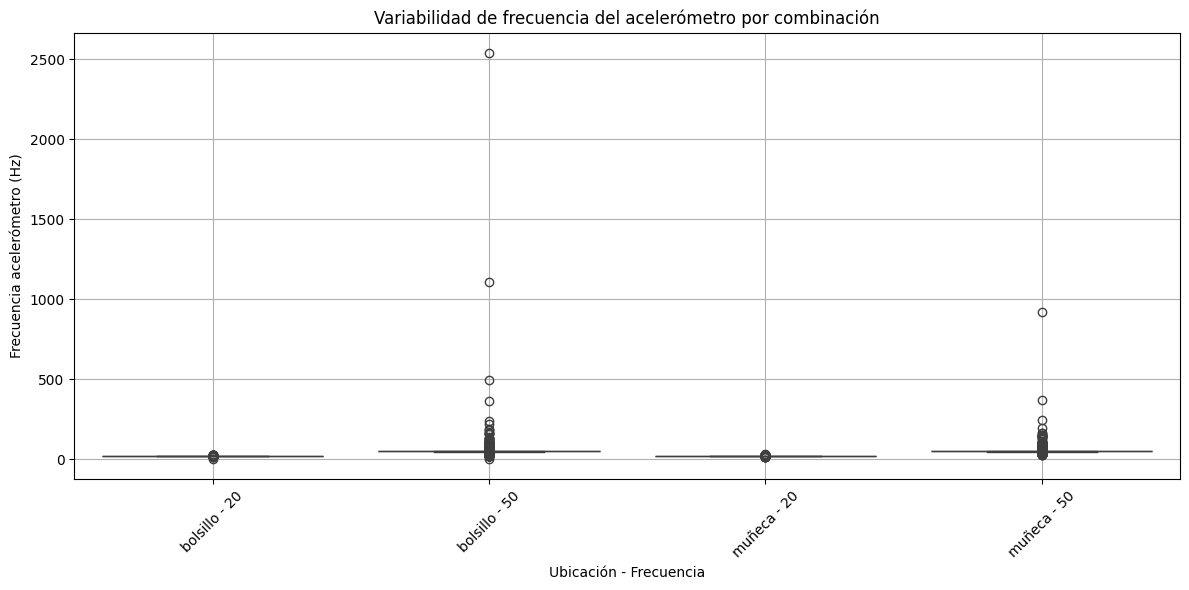

In [14]:
# Gráfico boxplot para acelerómetro después de la depuración
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='combinacion', y='accel_freq')
plt.title('Variabilidad de frecuencia del acelerómetro por combinación')
plt.xlabel('Ubicación - Frecuencia')
plt.ylabel('Frecuencia acelerómetro (Hz)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**1.5  SUAVIZADO Y LIMPIEZA**
- Suavizado por media móvil u otro filtro
- Reemplazo de NaN
- Comparación visual antes y después del filtro

Aplicando un filtro de suavizado

Objetivo: Reduce el efecto del ruido de alta frecuencia (los picos en accel_freq).

FILTRO MEDIANA MOVIL: Elimina outliers o pico extremos como en el caso de 50HZ que hay picos falsos. Conserva la forma de la señal sin desplazarla mucho.

In [15]:
df_filtrado['accel_freq_suavizada'] = df_filtrado['accel_freq'].rolling(window=5, center=True).median() #ventana deslizante de 5 elementos
df_filtrado.to_excel('dataset_filtrado_suavizado.xlsx', index=False)
df_filtrado

/tmp/ipython-input-3920535433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['accel_freq_suavizada'] = df_filtrado['accel_freq'].rolling(window=5, center=True).median() #ventana deslizante de 5 elementos


,timestamp,ax,ay,az,gx,gy,gz,accel_freq,gyro_freq,participante,etiqueta,ubicacion,frecuencia_nominal,combinacion,outlier_freq,accel_freq_suavizada
28721,2025-05-20T17:41:29.649175,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,20.10,20.10,P3,caerse,bolsillo,20,bolsillo - 20,False,NaN
28722,2025-05-20T17:41:29.699515,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,19.86,19.86,P3,caerse,bolsillo,20,bolsillo - 20,False,NaN
28723,2025-05-20T17:41:29.752245,1.098306,3.135196,9.041281,-0.044746,-0.004429,0.040470,19.01,19.01,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08
28724,2025-05-20T17:41:29.799432,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,21.13,21.13,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01
28725,2025-05-20T17:41:29.849248,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,20.08,20.08,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79569,2025-05-20T17:11:02.034048,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.46,49.46,P5,sentarse,muñeca,50,muñeca - 50,False,51.27
79570,2025-05-20T17:11:02.053553,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,51.27,51.27,P5,sentarse,muñeca,50,muñeca - 50,False,50.22
79571,2025-05-20T17:11:02.073619,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.84,49.84,P5,sentarse,muñeca,50,muñeca - 50,False,49.84
79572,2025-05-20T17:11:02.093533,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,50.22,50.22,P5,sentarse,muñeca,50,muñeca - 50,False,NaN


Rellenando los NaN

In [16]:
df_filtrado['accel_freq_suavizada'] = df_filtrado['accel_freq_suavizada'].fillna(method='bfill')  # llena los primeros, rellena hacia adelante
df_filtrado['accel_freq_suavizada'] = df_filtrado['accel_freq_suavizada'].fillna(method='ffill')  # llena los últimos, relleba hacía atrás

df_filtrado.to_excel('dataset_filtrado_suavizado_sin_NAN.xlsx', index=False)
df_filtrado

/tmp/ipython-input-992146323.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado['accel_freq_suavizada'] = df_filtrado['accel_freq_suavizada'].fillna(method='bfill')  # llena los primeros, rellena hacia adelante
/tmp/ipython-input-992146323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['accel_freq_suavizada'] = df_filtrado['accel_freq_suavizada'].fillna(method='bfill')  # llena los primeros, rellena hacia adelante
/tmp/ipython-input-992146323.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado['accel_freq_suavizada'] = df_filtrado

,timestamp,ax,ay,az,gx,gy,gz,accel_freq,gyro_freq,participante,etiqueta,ubicacion,frecuencia_nominal,combinacion,outlier_freq,accel_freq_suavizada
28721,2025-05-20T17:41:29.649175,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,20.10,20.10,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08
28722,2025-05-20T17:41:29.699515,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,19.86,19.86,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08
28723,2025-05-20T17:41:29.752245,1.098306,3.135196,9.041281,-0.044746,-0.004429,0.040470,19.01,19.01,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08
28724,2025-05-20T17:41:29.799432,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,21.13,21.13,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01
28725,2025-05-20T17:41:29.849248,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,20.08,20.08,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79569,2025-05-20T17:11:02.034048,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.46,49.46,P5,sentarse,muñeca,50,muñeca - 50,False,51.27
79570,2025-05-20T17:11:02.053553,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,51.27,51.27,P5,sentarse,muñeca,50,muñeca - 50,False,50.22
79571,2025-05-20T17:11:02.073619,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.84,49.84,P5,sentarse,muñeca,50,muñeca - 50,False,49.84
79572,2025-05-20T17:11:02.093533,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,50.22,50.22,P5,sentarse,muñeca,50,muñeca - 50,False,49.84


Visualización de accel_freq antes y después del filtro

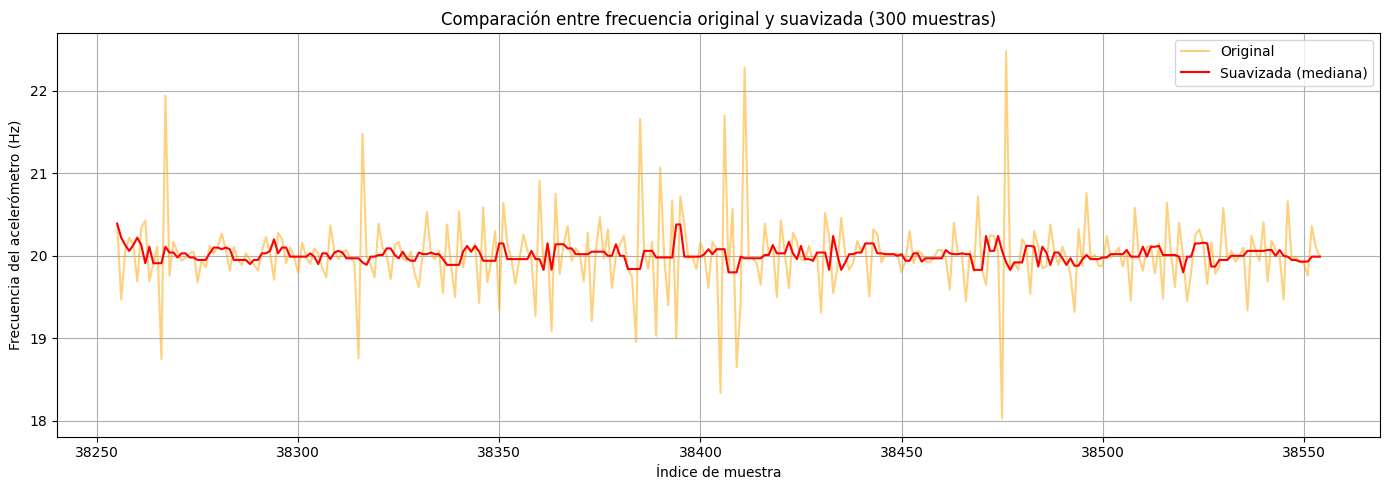

In [17]:
# Ordenar por timestamp
if 'timestamp' in df_filtrado.columns:
    df_filtrado = df_filtrado.sort_values(by='timestamp')

# Seleccionar un rango de muestras para visualizar
df_sample = df_filtrado.iloc[:300]

# Graficar
plt.figure(figsize=(14, 5))
plt.plot(df_sample['accel_freq'], label='Original', color='orange', alpha=0.5)
plt.plot(df_sample['accel_freq_suavizada'], label='Suavizada (mediana)', color='red')
plt.title('Comparación entre frecuencia original y suavizada (300 muestras)')
plt.xlabel('Índice de muestra')
plt.ylabel('Frecuencia del acelerómetro (Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Análisis de la frecuencia por actividad

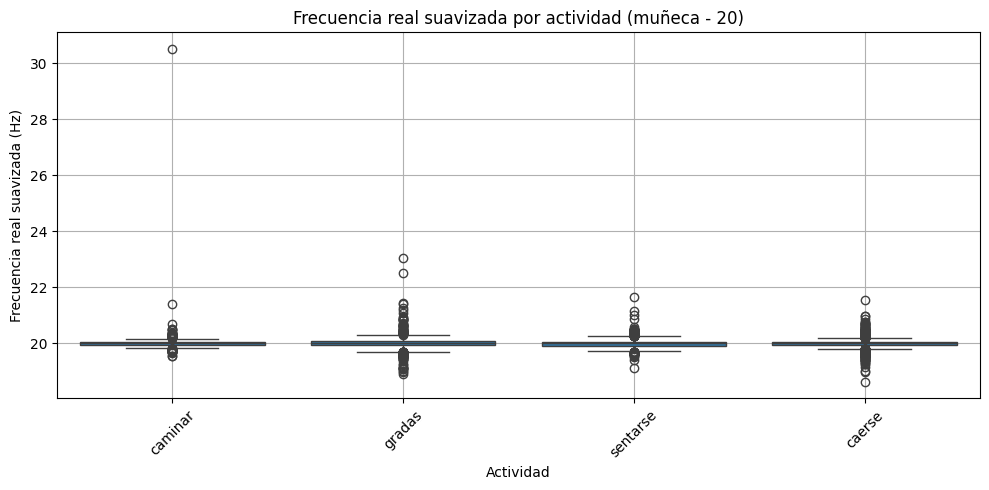

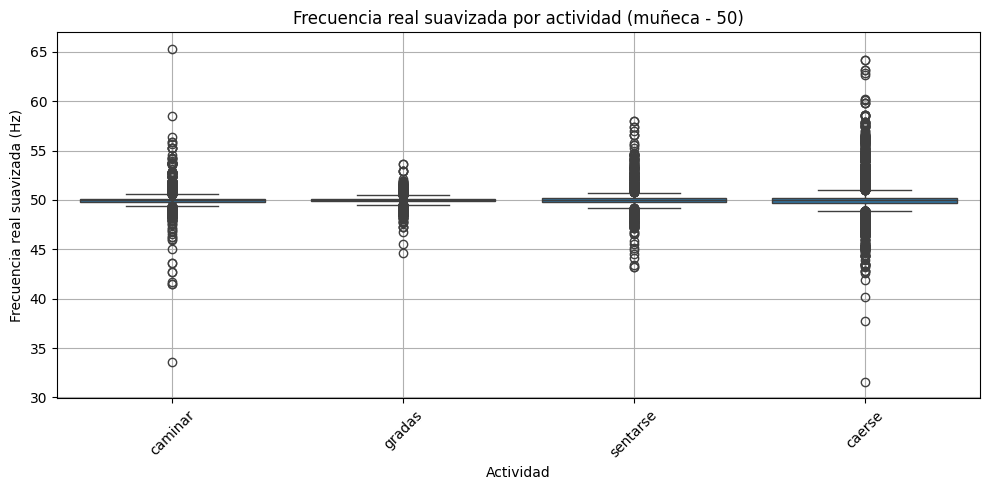

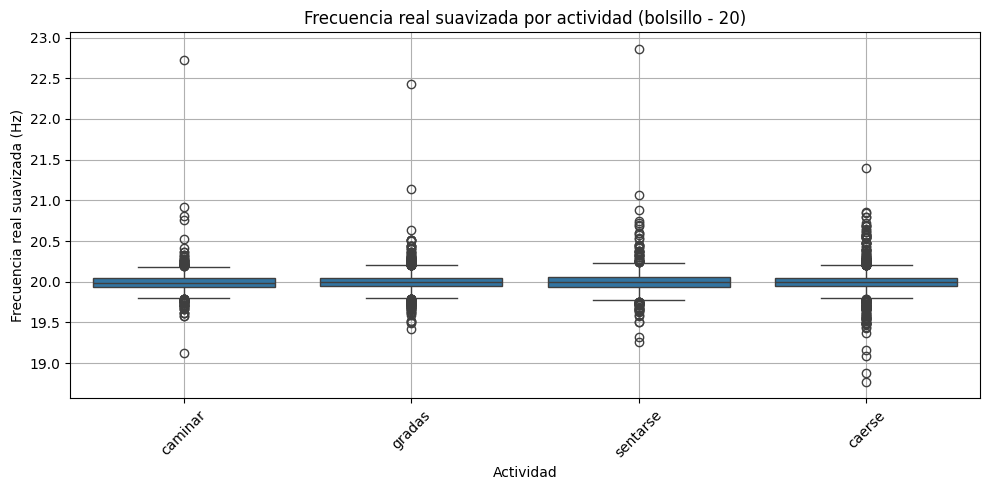

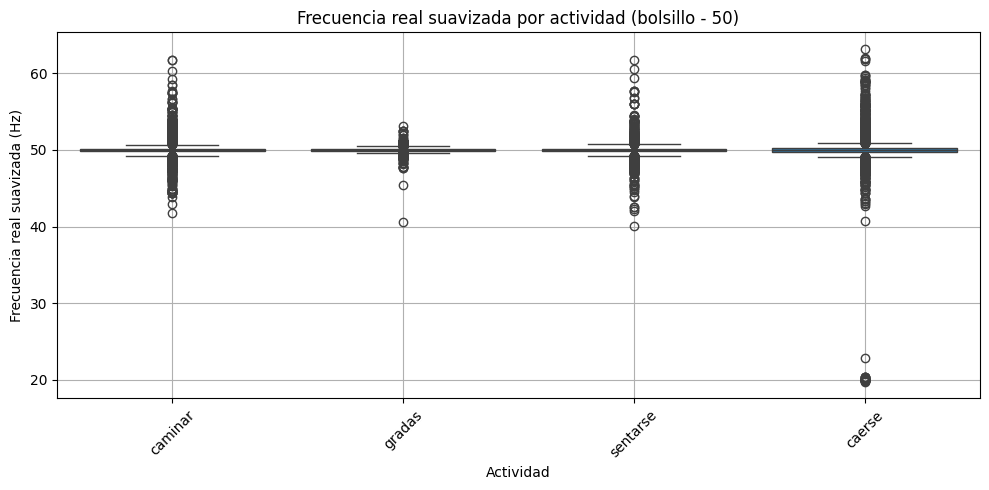

In [18]:
combinaciones = df_filtrado['combinacion'].unique()

for comb in combinaciones:
    df_c = df_filtrado[df_filtrado['combinacion'] == comb]

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_c, x='etiqueta', y='accel_freq_suavizada')
    plt.title(f'Frecuencia real suavizada por actividad ({comb})')
    plt.xlabel('Actividad')
    plt.ylabel('Frecuencia real suavizada (Hz)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
